In [51]:
import pandas as pd 
import numpy as np 
from numpy import linspace

import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

In [2]:
df = pd.read_csv("D:/ADSP/Hertfordshire-Constabulary/data/df-model.csv")
df

,LSOA_code,outcome_type,crime_type,date_year,date_month
0,891,1,0,2019,3
1,1059,0,8,2019,3
2,1165,1,2,2019,3
3,866,0,2,2019,3
4,937,0,8,2019,3
...,...,...,...,...,...
121355,891,0,5,2022,2
121356,501,0,8,2022,2
121357,483,0,9,2022,2
121358,998,0,8,2022,2


In [21]:
df["outcome_type"].value_counts()

0    98038
1    23322
Name: outcome_type, dtype: int64

To avoid data leakage, splitting the train test split and then normalizing data

In [5]:
x_input = df[["LSOA_code","crime_type", "date_year", "date_month"]]
x_input

,LSOA_code,crime_type,date_year,date_month
0,891,0,2019,3
1,1059,8,2019,3
2,1165,2,2019,3
3,866,2,2019,3
4,937,8,2019,3
...,...,...,...,...
121355,891,5,2022,2
121356,501,8,2022,2
121357,483,9,2022,2
121358,998,8,2022,2


In [6]:
y = df["outcome_type"]
y

0         1
1         0
2         1
3         0
4         0
         ..
121355    0
121356    0
121357    0
121358    0
121359    0
Name: outcome_type, Length: 121360, dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    x_input, 
    y, 
    test_size=0.20,
    random_state=4)

In [9]:
x_test

,LSOA_code,crime_type,date_year,date_month
89639,691,8,2021,6
38261,516,8,2020,3
37740,1025,8,2020,3
12167,1097,1,2019,7
75208,994,9,2021,1
...,...,...,...,...
35745,528,8,2020,2
118314,613,8,2022,2
60378,1098,1,2020,9
94063,534,2,2021,7


In [23]:
y_test.value_counts()

0    19570
1     4702
Name: outcome_type, dtype: int64

In [10]:
# demonstrate data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# create scaler
scaler = MinMaxScaler()
# fit scaler on data
scaler.fit(x_train)
# apply transform
x_train = scaler.transform(x_train)
x_train

array([[0.91631445, 0.55555556, 0.        , 1.        ],
       [0.84023669, 0.88888889, 0.33333333, 0.36363636],
       [0.2671175 , 0.88888889, 0.66666667, 0.63636364],
       ...,
       [0.83431953, 0.88888889, 0.66666667, 0.54545455],
       [0.71344041, 0.77777778, 0.66666667, 0.        ],
       [0.3956044 , 1.        , 0.66666667, 0.18181818]])

In [13]:
from sklearn.neighbors import KNeighborsClassifier
x_test = scaler.transform(x_test)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [14]:
knn.score(x_test,y_test)

0.815136783124588

In [15]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89     19570
           1       0.58      0.17      0.26      4702

    accuracy                           0.82     24272
   macro avg       0.70      0.57      0.58     24272
weighted avg       0.78      0.82      0.77     24272



In [30]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[18996   574]
 [ 3913   789]]


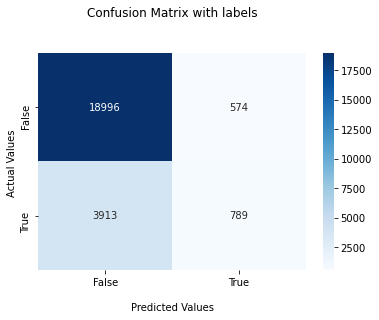

In [33]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

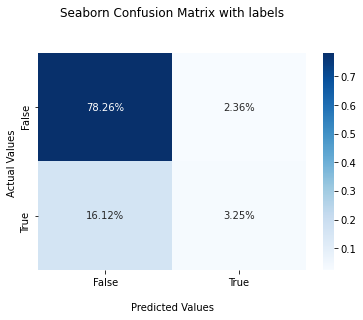

In [32]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [34]:
dct = DecisionTreeClassifier(criterion="entropy", max_depth=3, class_weight="balanced")
dct.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

In [35]:
y_pred = dct.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [36]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[16143  3427]
 [ 2613  2089]]


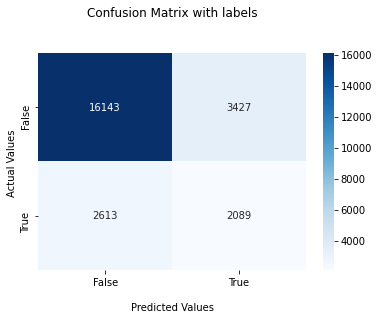

In [37]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

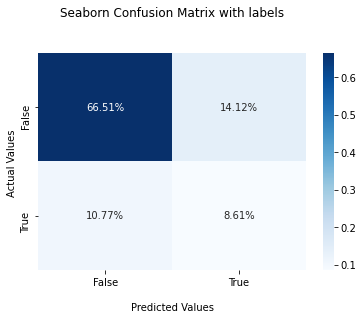

In [38]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV
class_weight = np.linspace(0.05, 1.5, 20)
grid_para = {'class_weight' : [{0: x, 1: 1.0-x} for x in class_weight]}

gridsearch = GridSearchCV(estimator = DecisionTreeClassifier(),
                          param_grid = grid_para,
                          scoring = 'f1_macro',
                          cv = 3)
gridsearch.fit(x_train, y_train)
print(gridsearch.best_params_)

{'class_weight': {0: 0.2789473684210526, 1: 0.7210526315789474}}


In [45]:
dct = DecisionTreeClassifier(criterion="entropy", max_depth=3, 
class_weight={0: 0.2789473684210526, 1: 0.7210526315789474})
dct.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2789473684210526,
                                     1: 0.7210526315789474},
                       criterion='entropy', max_depth=3)

In [46]:
y_pred = dct.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [47]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[16847  2723]
 [ 2862  1840]]


In [52]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='saga', multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }
    },
    "XGBClassifier": {
        "model": XGBClassifier(use_label_encoder=False),
        "params": {'n_estimators': range(6, 10),
        'max_depth': range(3, 8),
        'learning_rate': [.2, .3, .4],
        'colsample_bytree': [.7, .8, .9, 1]}
    }     
}

'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.

'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

In [ ]:
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, 
    scoring = "f1", return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_metrics = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_metrics

In [54]:
df

,model,best_score,best_params
0,svm,0.000000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.357504,{'n_estimators': 5}
2,logistic_regression,0.000000,{'C': 1}
3,naive_bayes_gaussian,0.050916,{}
4,naive_bayes_multinomial,0.000000,{}
5,decision_tree,0.354199,{'criterion': 'entropy'}
6,XGBClassifier,0.204743,"{'colsample_bytree': 1, 'learning_rate': 0.4, ..."
